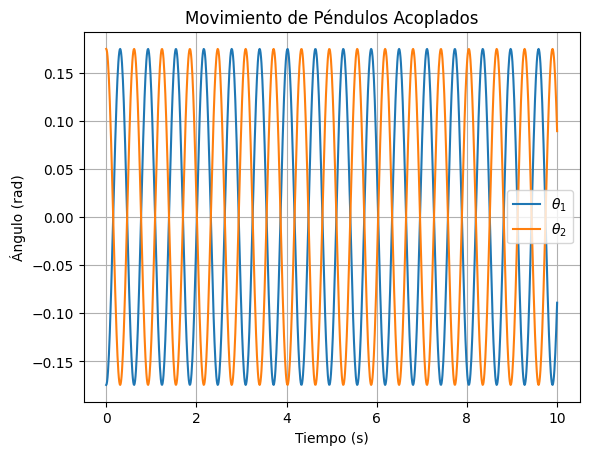

In [1]:
import numpy as np
import matplotlib.pyplot as plt


g = 9.8
l = 2.0
m = 1.0
k = 200.0


omega_0 = np.sqrt(g / l)
kappa = k / (4 * m)


def equations(t, y):

    theta1, omega1, theta2, omega2 = y


    dtheta1_dt = omega1
    dtheta2_dt = omega2


    domega1_dt = (-omega_0**2 * np.sin(theta1)
                   - kappa * (np.sin(theta1) * np.cos(theta1) - np.sin(theta2) * np.cos(theta1)))


    domega2_dt = (-omega_0**2 * np.sin(theta2)
                   - kappa * (np.sin(theta2) * np.cos(theta2) - np.sin(theta1) * np.cos(theta2)))


    return np.array([dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt])


def rk4_step(func, t, y, dt):

    k1 = func(t, y)
    k2 = func(t + 0.5 * dt, y + 0.5 * dt * k1)
    k3 = func(t + 0.5 * dt, y + 0.5 * dt * k2)
    k4 = func(t + dt, y + dt * k3)


    return y + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)


y0 = np.array([-np.pi / 18, 0.0, np.pi / 18, 0.0])


dt = 0.01
T = 10.0
n_steps = int(T / dt)

t_values = np.linspace(0, T, n_steps)
theta1_values = np.zeros(n_steps)
theta2_values = np.zeros(n_steps)


y = y0


for i in range(n_steps):

    theta1_values[i] = y[0]
    theta2_values[i] = y[2]


    y = rk4_step(equations, t_values[i], y, dt)


plt.plot(t_values, theta1_values, label=r'$\theta_1$')
plt.plot(t_values, theta2_values, label=r'$\theta_2$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Movimiento de Péndulos Acoplados')
plt.legend()
plt.grid(True)
plt.show()
